In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('2017_WADI/WADI_14days_new.csv')

In [2]:
df2 = pd.read_csv('2017_WADI/WADI_attackdataLABLE.csv', header = 1)

In [3]:
import datetime
timestamp = pd.date_range("10/09/17 18:00:00", periods = 172801, freq = "s")
timestamp

DatetimeIndex(['2017-10-09 18:00:00', '2017-10-09 18:00:01',
               '2017-10-09 18:00:02', '2017-10-09 18:00:03',
               '2017-10-09 18:00:04', '2017-10-09 18:00:05',
               '2017-10-09 18:00:06', '2017-10-09 18:00:07',
               '2017-10-09 18:00:08', '2017-10-09 18:00:09',
               ...
               '2017-10-11 17:59:51', '2017-10-11 17:59:52',
               '2017-10-11 17:59:53', '2017-10-11 17:59:54',
               '2017-10-11 17:59:55', '2017-10-11 17:59:56',
               '2017-10-11 17:59:57', '2017-10-11 17:59:58',
               '2017-10-11 17:59:59', '2017-10-11 18:00:00'],
              dtype='datetime64[ns]', length=172801, freq='S')

In [4]:
df2 = df2[:-2]
df2['TimeStamp'] = timestamp
first_col = df2.pop('TimeStamp')
df2.insert(0, 'TimeStamp', first_col)
df2 = df2.dropna(axis = 1)
df2_clean = df2.drop(['Row ', 'TimeStamp', 'Date ', 'Time', 'Attack LABLE (1:No Attack, -1:Attack)'], axis = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2_scaled = pd.DataFrame(scaler.fit_transform(df2_clean))

In [9]:
kmeans = KMeans(n_clusters =2, random_state = 22).fit_predict(df2_scaled)
print(kmeans)

[1 1 1 ... 1 1 1]


In [10]:
df2['pred'] = kmeans

In [11]:
#df2['pred'] = df2['pred'].replace(1, -1)
df2['pred'] = df2['pred'].replace(0, -1)

In [12]:
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)",pred
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1


In [13]:
confusion_matrix = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred'], rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

Predicted     -1      1
Actual                 
-1          6514   3463
 1         72798  90026


In [14]:
#Drop some variables
def remove_1(df):
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df.drop(col, inplace=True, axis =1)
    return df

In [15]:
df3 = remove_1(df2_clean) #df3 removes columns from df2 with only 1 unique value
df3.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,...,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,...,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,...,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,...,9.02457,8.72859,475.394,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,...,9.02457,8.72859,475.394,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39


In [16]:
df3.shape

(172801, 96)

In [17]:
df3_scaled = pd.DataFrame(scaler.fit_transform(df3))

In [18]:
kmeans_reduced = KMeans(n_clusters = 2, random_state = 22).fit_predict(df3_scaled)

In [19]:
df2['pred2'] = kmeans_reduced
df2['pred2'] = df2['pred2'].replace(0,-1)
#df2['pred2'] = df2['pred2'].replace(0,1)
df2['cluster'] = kmeans_reduced
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)",pred,pred2,cluster
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1


In [20]:
confusion_matrix_red = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred2'], rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix_red)

Predicted     -1      1
Actual                 
-1          6514   3463
 1         72798  90026


In [21]:
# try kMeans with 1 centroid then plot for outliers
kmeans0 = KMeans(n_clusters =1, random_state = 22)
kmeans_0 = kmeans0.fit(df3_scaled)

In [22]:
kmeans_0.cluster_centers_

array([[2.77718903e-01, 1.08151626e-01, 9.85020949e-01, 9.35886598e-01,
        4.86272933e-01, 2.17258878e-01, 4.85095345e-01, 6.37143304e-01,
        5.04157962e-01, 5.04129027e-01, 6.25360964e-01, 2.79986806e-01,
        2.79766899e-01, 2.22620239e-01, 4.86108298e-04, 9.36366038e-01,
        6.37142171e-01, 3.97178289e-02, 3.66368278e-01, 6.04969493e-01,
        3.72783762e-02, 3.44600023e-01, 6.67070797e-01, 2.39308545e-02,
        3.12987970e-01, 5.95989316e-01, 3.30013796e-02, 3.30186238e-01,
        6.08245329e-01, 3.02193333e-02, 3.17947482e-01, 6.19967779e-01,
        2.83487002e-02, 3.05244038e-01, 1.37397459e-01, 1.78697106e-01,
        3.62846427e-02, 3.99083585e-02, 3.68703258e-02, 2.49017208e-02,
        3.30046485e-02, 3.24522183e-02, 2.83750272e-02, 2.01387723e-03,
        3.53585917e-03, 1.39466785e-03, 3.14234293e-03, 2.33794943e-03,
        2.89928878e-03, 1.37151984e-03, 3.03238986e-03, 2.00809023e-03,
        3.39118408e-03, 6.89810823e-03, 3.14812993e-03, 4.409629

In [23]:
df2['kmeans_0'] = np.linalg.norm(kmeans_0.cluster_centers_)

In [24]:
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)",pred,pred2,cluster,kmeans_0
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169


In [25]:
eucldist = []
for row in range(len(df3_scaled)):
    dist = (np.linalg.norm(df3_scaled.loc[row,:]))
    eucldist.append(dist)

In [26]:
df2['eucldist'] = eucldist
df2['delta'] = abs(df2['kmeans_0'] - df2['eucldist'])
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)",pred,pred2,cluster,kmeans_0,eucldist,delta
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,62.6226,1.0,0.39,1,1,1,1,4.461169,4.650212,0.189042
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,62.6226,1.0,0.39,1,1,1,1,4.461169,4.650212,0.189042
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,62.6226,1.0,0.39,1,1,1,1,4.461169,4.650212,0.189042
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,62.6226,1.0,0.39,1,1,1,1,4.461169,4.679158,0.217988
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,62.6226,1.0,0.39,1,1,1,1,4.461169,4.679158,0.217988


<AxesSubplot: >

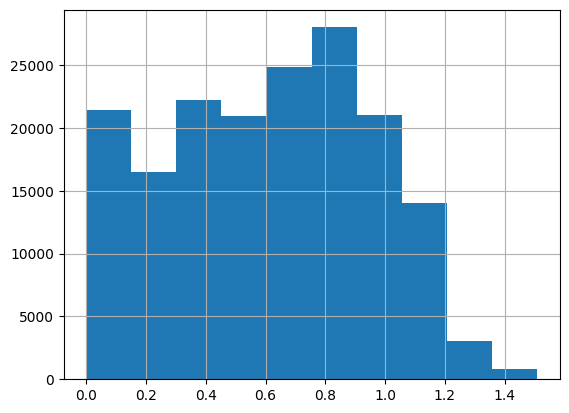

In [27]:
df2['delta'].hist()

In [31]:
pred_attack = []
for i in range(len(df2)):
    if df2['delta'][i] > 1.2:
        pred_attack.append(-1)
    else:
        pred_attack.append(1)
#df2['pred_attack'] = 

In [32]:
df2['pred_attack'] = pred_attack

In [33]:
conf_matrix = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred_attack'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix)

Predicted    -1       1
Actual                 
-1         1471    8506
 1         2530  160294


In [34]:
# increase number of clusters and find outliers intra centroid
kmeans1 = KMeans(n_clusters =2, random_state = 22)
kmeans_1 = kmeans1.fit(df3_scaled)
kmeans_1a = kmeans_1.cluster_centers_[0,:]
kmeans_1b = kmeans_1.cluster_centers_[1,:]

In [35]:
df2['kmeans_1a'] = np.linalg.norm(kmeans_1a)
df2['kmeans_1b'] = np.linalg.norm(kmeans_1b)
df2['delta_1a'] = abs(df2['kmeans_1a'] - df2['eucldist'])
df2['delta_1b'] = abs(df2['kmeans_1b'] - df2['eucldist'])
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,pred2,cluster,kmeans_0,eucldist,delta,pred_attack,kmeans_1a,kmeans_1b,delta_1a,delta_1b
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,1,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,1,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703


<AxesSubplot: >

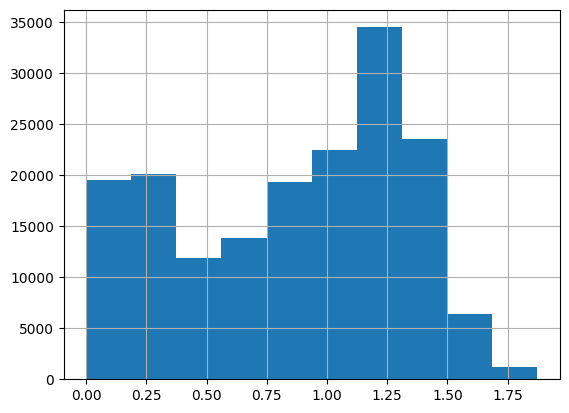

In [36]:
df2['delta_1a'].hist()

<AxesSubplot: >

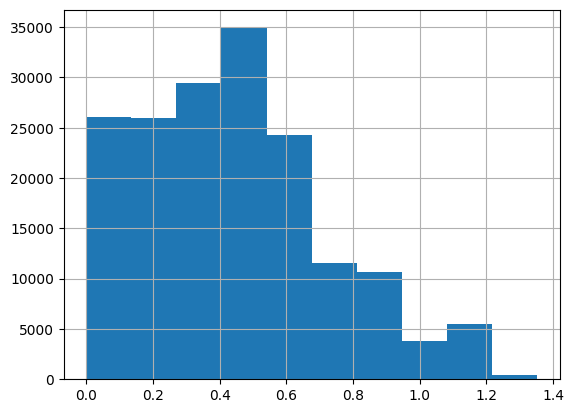

In [37]:
df2['delta_1b'].hist()

In [38]:
pred_attack2 = []
for i in range(len(df2)):
    if df2['delta_1a'][i]>1.75:
        pred_attack2.append(-1)
    elif df2['delta_1a'][i]>1.2:
        pred_attack2.append(-1)
    else:
        pred_attack2.append(1)
    


In [39]:
df2['pred_attack2'] = pred_attack2

In [40]:
conf_matrix_2 = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred_attack2'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix_2)

Predicted     -1       1
Actual                  
-1          4938    5039
 1         49993  112831


In [41]:
# Segment the attack dataframe to group by phases of the process.  First is suite 1

In [42]:
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,cluster,kmeans_0,eucldist,delta,pred_attack,kmeans_1a,kmeans_1b,delta_1a,delta_1b,pred_attack2
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703,1
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,1,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703,1


In [43]:
df_suite1 = df3.iloc[:,0:15]

In [44]:
df_suite1_scaled = pd.DataFrame(scaler.fit_transform(df_suite1))
df_suite1_scaled.columns = df_suite1.columns

In [45]:
df_suite1_scaled.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_003_STATUS,1_P_005_STATUS,1_P_006_STATUS
0,0.258805,0.088248,0.990702,0.995069,0.865286,0.000268,0.300407,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
1,0.258805,0.088248,0.990702,0.995069,0.865286,0.000268,0.300407,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
2,0.258805,0.088248,0.990702,0.995069,0.865286,0.000268,0.300407,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
3,0.258805,0.088248,0.990702,0.995069,0.865286,0.000268,0.300407,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
4,0.258805,0.088248,0.990702,0.995069,0.865286,0.000268,0.300407,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0


In [46]:
kmeans_suite1 = KMeans(n_clusters =2, random_state = 22).fit_predict(df_suite1_scaled)
print(kmeans_suite1)

[0 0 0 ... 0 0 0]


In [47]:
df2['pred_suite1'] = kmeans_suite1
df2['pred_suite1'] = df2['pred_suite1'].replace(1, -1)
df2['pred_suite1'] = df2['pred_suite1'].replace(0, 1)
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,...,kmeans_0,eucldist,delta,pred_attack,kmeans_1a,kmeans_1b,delta_1a,delta_1b,pred_attack2,pred_suite1
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1,1
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1,1
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1,1
3,2017-10-09 18:00:03,4.0,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703,1,1
4,2017-10-09 18:00:04,5.0,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,...,4.461169,4.679158,0.217988,1,4.097024,4.91986,0.582133,0.240703,1,1


In [48]:
conf_matrix_suite1 = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred_suite1'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix_suite1)

Predicted     -1       1
Actual                  
-1          6891    3086
 1         41458  121366


In [49]:
#Remove the following attacks as they are for suite2 10/10/17 11:30:40 to 10/10/17 11:44:50
# 10/10/17 13:39:30 to 10/10/17 13:50:40  mask
# 10/10/17 17:40:00 to 10/10/17 17:49:40  mask2
# 11/10/17 11:36:31 to 11/10/17 11:47:00  mask3
# 11/10/17 11:59:00 to 11/10/17 12:05:00  mask4
# 11/10/17 12:07:30 to 11/10/17 12:10:52  mask5
df2.shape

(172801, 141)

In [50]:
#Create 'suite1_attack' for only attacks in suite1
df2['Suite1_Attack'] = df2['Attack LABLE (1:No Attack, -1:Attack)']

In [74]:
mask = (df2['TimeStamp'] > '2017-10-10 13:39:30') & (df2['TimeStamp'] < '2017-10-10 13:50:40')
df2.loc[mask,'Suite1_Attack'] = 1

In [76]:
mask2 = (df2['TimeStamp'] > '2017-10-10 17:40:00') & (df2['TimeStamp'] < '2017-10-10 17:49:40')
mask3 = (df2['TimeStamp'] > '2017-10-11 11:36:31') & (df2['TimeStamp'] < '2017-10-11 11:47:00')
mask4 = (df2['TimeStamp'] > '2017-10-11 11:59:00') & (df2['TimeStamp'] < '2017-10-11 12:05:00')
mask5 = (df2['TimeStamp'] > '2017-10-11 12:07:30') & (df2['TimeStamp'] < '2017-10-11 12:10:52')
mask6 = (df2['TimeStamp'] > '2017-10-10 11:30:40') & (df2['TimeStamp'] < '2017-10-10 11:44:50')

In [77]:
df2.loc[mask2,'Suite1_Attack'] = 1
df2.loc[mask3,'Suite1_Attack'] = 1
df2.loc[mask4,'Suite1_Attack'] = 1
df2.loc[mask5,'Suite1_Attack'] = 1
df2.loc[mask6,'Suite1_Attack'] = 1

In [78]:
conf_matrix_suite1 = pd.crosstab(df2['Suite1_Attack'], df2['pred_suite1'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix_suite1)

Predicted     -1       1
Actual                  
-1          5059    1842
 1         43290  122610


In [58]:
pd.set_option('display.max_columns', None)
df3.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_003_STATUS,1_P_005_STATUS,1_P_006_STATUS,2_DPIT_001_PV,2_FIC_101_CO,2_FIC_101_PV,2_FIC_101_SP,2_FIC_201_CO,2_FIC_201_PV,2_FIC_201_SP,2_FIC_301_CO,2_FIC_301_PV,2_FIC_301_SP,2_FIC_401_CO,2_FIC_401_PV,2_FIC_401_SP,2_FIC_501_CO,2_FIC_501_PV,2_FIC_501_SP,2_FIC_601_CO,2_FIC_601_PV,2_FIC_601_SP,2_FIT_001_PV,2_FIT_002_PV,2_FIT_003_PV,2_FQ_101_PV,2_FQ_201_PV,2_FQ_301_PV,2_FQ_401_PV,2_FQ_501_PV,2_FQ_601_PV,2_LS_101_AH,2_LS_101_AL,2_LS_201_AH,2_LS_201_AL,2_LS_301_AH,2_LS_301_AL,2_LS_401_AH,2_LS_401_AL,2_LS_501_AH,2_LS_501_AL,2_LS_601_AH,2_LS_601_AL,2_LT_001_PV,2_LT_002_PV,2_MCV_007_CO,2_MCV_101_CO,2_MCV_201_CO,2_MCV_301_CO,2_MCV_401_CO,2_MCV_501_CO,2_MCV_601_CO,2_MV_003_STATUS,2_MV_006_STATUS,2_MV_101_STATUS,2_MV_201_STATUS,2_MV_301_STATUS,2_MV_401_STATUS,2_MV_501_STATUS,2_MV_601_STATUS,2_P_003_SPEED,2_P_003_STATUS,2_P_004_SPEED,2_PIC_003_CO,2_PIC_003_PV,2_PIC_003_SP,2_PIT_001_PV,2_PIT_002_PV,2_PIT_003_PV,2A_AIT_001_PV,2A_AIT_002_PV,2A_AIT_003_PV,2A_AIT_004_PV,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,50.0,0.025071,1.0,152.437,89.5817,0.025071,0.168945,7.810000e-41,8.6875,473.890,0.188477,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,50.0,0.025071,1.0,152.437,89.5817,0.025071,0.168945,7.810000e-41,8.6875,473.890,0.188477,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,50.0,0.025071,1.0,152.437,89.5817,0.025071,0.168945,7.810000e-41,8.6875,473.890,0.188477,8.96011,8.69146,475.488,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,50.0,0.025071,1.0,152.437,89.5817,0.025071,0.168945,7.290000e-41,8.6875,473.833,0.188477,9.02457,8.72859,475.394,11.528,-65.9686,0.755703,0.626306,64.3306,62.6226,0.39
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.0

In [68]:
# only columns from Suite 2
df_suite2 = df3.iloc[:,16:89]

In [69]:
df_suite2_scaled = pd.DataFrame(scaler.fit_transform(df_suite2))
df_suite2_scaled.columns = df_suite2.columns

In [71]:
df_suite2_scaled.head()

,2_FIC_101_CO,2_FIC_101_PV,2_FIC_101_SP,2_FIC_201_CO,2_FIC_201_PV,2_FIC_201_SP,2_FIC_301_CO,2_FIC_301_PV,2_FIC_301_SP,2_FIC_401_CO,2_FIC_401_PV,2_FIC_401_SP,2_FIC_501_CO,2_FIC_501_PV,2_FIC_501_SP,2_FIC_601_CO,2_FIC_601_PV,2_FIC_601_SP,2_FIT_001_PV,2_FIT_002_PV,2_FIT_003_PV,2_FQ_101_PV,2_FQ_201_PV,2_FQ_301_PV,2_FQ_401_PV,2_FQ_501_PV,2_FQ_601_PV,2_LS_101_AH,2_LS_101_AL,2_LS_201_AH,2_LS_201_AL,2_LS_301_AH,2_LS_301_AL,2_LS_401_AH,2_LS_401_AL,2_LS_501_AH,2_LS_501_AL,2_LS_601_AH,2_LS_601_AL,2_LT_001_PV,2_LT_002_PV,2_MCV_007_CO,2_MCV_101_CO,2_MCV_201_CO,2_MCV_301_CO,2_MCV_401_CO,2_MCV_501_CO,2_MCV_601_CO,2_MV_003_STATUS,2_MV_006_STATUS,2_MV_101_STATUS,2_MV_201_STATUS,2_MV_301_STATUS,2_MV_401_STATUS,2_MV_501_STATUS,2_MV_601_STATUS,2_P_003_SPEED,2_P_003_STATUS,2_P_004_SPEED,2_PIC_003_CO,2_PIC_003_PV,2_PIC_003_SP,2_PIT_001_PV,2_PIT_002_PV,2_PIT_003_PV,2A_AIT_001_PV,2A_AIT_002_PV,2A_AIT_003_PV,2A_AIT_004_PV,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV
0,0.301893,0.088006,0.268293,0.656061,0.102784,0.028571,1.0,0.009629,0.02439,0.147284,0.052862,0.02439,1.0,0.009624,0.047619,1.0,0.012631,0.15,0.0,0.36862,0.0,0.087956,0.103055,0.010014,0.051243,0.010339,0.012631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680894,0.789851,0.0,0.0,0.0,0.200685,0.0,0.686983,0.356947,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.001846,0.0,0.879294,1.0,0.00568,1.0,0.771271,0.918687,0.005291,0.0,4.478127e-41,0.75,0.439491,0.366693,0.000038,0.781739,0.398462
1,0.301893,0.088006,0.268293,0.656061,0.102784,0.028571,1.0,0.009629,0.02439,0.147284,0.052862,0.02439,1.0,0.009624,0.047619,1.0,0.012631,0.15,0.0,0.36862,0.0,0.087956,0.103055,0.010014,0.051243,0.010339,0.012631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680894,0.789851,0.0,0.0,0.0,0.200685,0.0,0.686983,0.356947,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.001846,0.0,0.879294,1.0,0.00568,1.0,0.771271,0.918687,0.005291,0.0,4.478127e-41,0.75,0.439491,0.366693,0.000038,0.781739,0.398462
2,0.301893,0.088006,0.268293,0.656061,0.102784,0.028571,1.0,0.009629,0.02439,0.147284,0.052862,0.02439,1.0,0.009624,0.047619,1.0,0.012631,0.15,0.0,0.36862,0.0,0.087956,0.103055,0.010014,0.051243,0.010339,0.012631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680894,0.789851,0.0,0.0,0.0,0.200685,0.0,0.686983,0.356947,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.001846,0.0,0.879294,1.0,0.00568,1.0,0.771271,0.918687,0.005291,0.0,4.478127e-41,0.75,0.439491,0.366693,0.000038,0.781739,0.398462
3,0.301893,0.088006,0.268293,0.656061,0.102784,0.028571,1.0,0.009629,0.02439,0.147284,0.052862,0.02439,1.0,0.009624,0.047619,1.0,0.012631,0.15,0.0,0.36862,0.0,0.087956,0.103055,0.010014,0.051243,0.010339,0.012631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680894,0.789851,0.0,0.0,0.0,0.200685,0.0,0.686983,0.356947,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.001846,0.0,0.879294,1.0,0.00568,1.0,0.771271,0.918687,0.005291,0.0,4.179957e-41,0.75,0.437227,0.366693,0.000046,0.941424,0.394514
4,0.301893,0.088006,0.268293,0.656061,0.102784,0.028571,1.0,0.009629,0.02439,0.147284,0.052862,0.02439,1.0,0.009624,0.047619,1.0,0.012631,0.15,0.0,0.36862,0.0,0.087956,0.103055,0.010014,0.051243,0.010339,0.012631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680894,0.789851,0.0,0.0,0.0,0.200685,0.0,0.686983,0.356947,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.001846,0.0,0.879294,1.0,0.00568,1.0,0.771271,0.918687,0.005291,0.0,4.179957e-41,0.75,0.437227,0.366693,0.000046,0.941424,0.394514


In [72]:
kmeans_suite2 = KMeans(n_clusters =2, random_state = 22).fit_predict(df_suite2_scaled)
df2['pred_suite2'] = kmeans_suite2
df2['pred_suite2'] = df2['pred_suite2'].replace(1, -1)
df2['pred_suite2'] = df2['pred_suite2'].replace(0, 1)
df2.head()

,TimeStamp,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_002_STATUS,1_P_003_STATUS,1_P_004_STATUS,1_P_005_STATUS,1_P_006_STATUS,2_DPIT_001_PV,2_FIC_101_CO,2_FIC_101_PV,2_FIC_101_SP,2_FIC_201_CO,2_FIC_201_PV,2_FIC_201_SP,2_FIC_301_CO,2_FIC_301_PV,2_FIC_301_SP,2_FIC_401_CO,2_FIC_401_PV,2_FIC_401_SP,2_FIC_501_CO,2_FIC_501_PV,2_FIC_501_SP,2_FIC_601_CO,2_FIC_601_PV,2_FIC_601_SP,2_FIT_001_PV,2_FIT_002_PV,2_FIT_003_PV,2_FQ_101_PV,2_FQ_201_PV,2_FQ_301_PV,2_FQ_401_PV,2_FQ_501_PV,2_FQ_601_PV,2_LS_101_AH,2_LS_101_AL,2_LS_201_AH,2_LS_201_AL,2_LS_301_AH,2_LS_301_AL,2_LS_401_AH,2_LS_401_AL,2_LS_501_AH,2_LS_501_AL,2_LS_601_AH,2_LS_601_AL,2_LT_001_PV,2_LT_002_PV,2_MCV_007_CO,2_MCV_101_CO,2_MCV_201_CO,2_MCV_301_CO,2_MCV_401_CO,2_MCV_501_CO,2_MCV_601_CO,2_MV_001_STATUS,2_MV_002_STATUS,2_MV_003_STATUS,2_MV_004_STATUS,2_MV_005_STATUS,2_MV_006_STATUS,2_MV_009_STATUS,2_MV_101_STATUS,2_MV_201_STATUS,2_MV_301_STATUS,2_MV_401_STATUS,2_MV_501_STATUS,2_MV_601_STATUS,2_P_003_SPEED,2_P_003_STATUS,2_P_004_SPEED,2_P_004_STATUS,2_PIC_003_CO,2_PIC_003_PV,2_PIC_003_SP,2_PIT_001_PV,2_PIT_002_PV,2_PIT_003_PV,2_SV_101_STATUS,2_SV_201_STATUS,2_SV_301_STATUS,2_SV_401_STATUS,2_SV_501_STATUS,2_SV_601_STATUS,2A_AIT_001_PV,2A_AIT_002_PV,2A_AIT_003_PV,2A_AIT_004_PV,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LS_001_AL,3_LT_001_PV,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)",pred,pred2,cluster,kmeans_0,eucldist,delta,pred_attack,kmeans_1a,kmeans_1b,delta_1a,delta_1b,pred_attack2,pred_suite1,Suite1_Attack,pred_suite2
0,2017-10-09 18:00:00,1.0,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,1.0,50.0,0.025071,1.0,152.437,89.5817,0.025071,1.0,1.0,1.0,1.0,1.0,1.0,0.168945,7.810000e-41,8.6875,473.890,0.188477,8.96011,8.69146,475.488,0.0,8279.1,11.528,-65.9686,0.755703,0.626306,1.0,64.3306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1,1,1,-1
1,2017-10-09 18:00:01,2.0,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8595,78.5906,0.0,0.0,0.0,20.0685,0.0,68.6983,35.6947,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,-0.016157,1.0,0.029574,1.0,50.0,0.025071,1.0,152.437,89.5817,0.025071,1.0,1.0,1.0,1.0,1.0,1.0,0.168945,7.810000e-41,8.6875,473.890,0.188477,8.96011,8.69146,475.488,0.0,8279.1,11.528,-65.9686,0.755703,0.626306,1.0,64.3306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1,1,1,1,4.461169,4.650212,0.189042,1,4.097024,4.91986,0.553187,0.269649,1,1,1,-1
2,2017-10-09 18:00:02,3.0,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100.0,0.04655,0.1,20.0701,0.175445,0.09,100.0,0.0488,0.11,100.0,0.051166,0.15,0.0,0.61969,0.0,0.239192,0.310242,0.04655,0.170598,0.0488,0.051166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.8

In [73]:
conf_matrix_suite2 = pd.crosstab(df2['Attack LABLE (1:No Attack, -1:Attack)'], df2['pred_suite2'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix_suite2)

Predicted     -1      1
Actual                 
-1          4665   5312
 1         92655  70169


In [92]:
#Create 'suite1_attack' for only attacks in suite1
df2['Suite2_Attack'] = df2['Attack LABLE (1:No Attack, -1:Attack)']

#
mask_1 = (df2['TimeStamp'] > '2017-10-09 19:25:00') & (df2['TimeStamp'] < '2017-10-09 19:50:16')
df2.loc[mask_1,'Suite2_Attack'] = 1

mask_2 = (df2['TimeStamp'] > '2017-10-10 10:24:10') & (df2['TimeStamp'] < '2017-10-10 10:34:00')
df2.loc[mask_2,'Suite2_Attack'] = 1

mask_3 = (df2['TimeStamp'] > '2017-10-11 10:55:00') & (df2['TimeStamp'] < '2017-10-11 10:56:27')
df2.loc[mask_3,'Suite2_Attack'] = 1

mask_4 = (df2['TimeStamp'] > '2017-10-11 11:17:54') & (df2['TimeStamp'] < '2017-10-11 11:31:20')
df2.loc[mask_4,'Suite2_Attack'] = 1

mask_5 = (df2['TimeStamp'] > '2017-10-10 10:55:00') & (df2['TimeStamp'] < '2017-10-10 11:24:00')
df2.loc[mask_5,'Suite2_Attack'] = 1

mask_6 = (df2['TimeStamp'] > '2017-10-10 14:48:17') & (df2['TimeStamp'] < '2017-10-10 14:59:55')
df2.loc[mask_6,'Suite2_Attack'] = 1



In [93]:
conf_matrix_suite2 = pd.crosstab(df2['Suite2_Attack'], df2['pred_suite2'], rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix_suite2)

Predicted     -1      1
Actual                 
-1          3089   1481
 1         94231  74000
